In [72]:
import re
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use("default")

In [73]:
attributeNames={
    "thumb":["hand_l","thumb_01_l","thumb_02_l","thumb_03_l","thumb_end_l"],
    "index":["DAZ_lCarpal1","index_01_l","index_02_l","index_03_l","index_end_l"],
    "middle":["DAZ_lCarpal2","middle_01_l","middle_02_l","middle_03_l","middle_end_l"],
    "ring":["DAZ_lCarpal3","ring_01_l","ring_02_l","ring_03_l","ring_end_l"],
    "pinky":["DAZ_lCarpal4","pinky_01_l","pinky_02_l","pinky_03_l","pinky_end_l"]
}

In [74]:
def getxyzOf(name,tsText):

    #finding the first match of string in tsText
    pattern="["+name+":]"
    match=re.search(name,tsText)
    if match:
        index=match.end()

        #finding the next "\n"
        match = re.search('[\n]', tsText[index:]) 
        lineLength=match.start()

        #slicing the line we need from the big string
        line=tsText[index+1:index+lineLength]

        #exctracting values from this line
        values=line.split(",")

        return values[0:3]

In [75]:
def load_data(filename):

    df=pd.DataFrame()
    
    #reading text from file
    textFile=open(filename,"r")
    text=textFile.read()
    textFile.close()

    #exctracting data for each timestamp
    pattern="ts: [0-9]*\.[0-9]*"
    rawData=re.split(pattern,text)[1:325] #324 first ts only

    #going through attributeNames one by one and extracting x y z for each name 
    # + creating a new line in the data frame containing all the values
    for i in range(len(rawData)):
        docLine={}

        for j in attributeNames.keys():
            for k in range(len(attributeNames[j])):
                name=attributeNames[j][k]
                #print(name)
                x,y,z=getxyzOf(name,rawData[i])
                doc={name+"_x":x,
                     name+"_y":y,
                     name+"_z":z}
                docLine.update(doc)

        dfLine=pd.DataFrame(docLine,index=[0])
        #print(dfLine)
        df=pd.concat([df,dfLine],ignore_index=True)
    
    print(df.head(1))         
    print("(lines,columns)",df.shape)
    return df   

In [83]:


df=load_data("skeleton_poses2.txt")
df = df.astype(float)
df.to_csv('hand_poses.csv')

     hand_l_x    hand_l_y     hand_l_z thumb_01_l_x thumb_01_l_y thumb_01_l_z  \
0   55.084961   84.742554   102.510841    53.607822    84.320145   101.585854   

  thumb_02_l_x thumb_02_l_y thumb_02_l_z thumb_03_l_x  ... pinky_01_l_z  \
0    50.878002    84.067322    99.900742    49.454945  ...    98.880615   

  pinky_02_l_x pinky_02_l_y pinky_02_l_z pinky_03_l_x pinky_03_l_y  \
0    53.845589    88.113541    97.044128    54.466854    87.245117   

  pinky_03_l_z pinky_end_l_x pinky_end_l_y pinky_end_l_z  
0    97.840019      54.60054     87.491211     99.217194  

[1 rows x 75 columns]
(lines,columns) (324, 75)


In [77]:
print(df.head(5))

     hand_l_x    hand_l_y     hand_l_z thumb_01_l_x thumb_01_l_y thumb_01_l_z  \
0   55.084961   84.742554   102.510841    53.607822    84.320145   101.585854   
1   55.079865   84.785759   102.543304    53.687061    84.208466   101.572327   
2    55.07988   84.785645   102.543213    53.783264    84.550308   101.326927   
3   55.084763   84.744026   102.511963    53.609947     84.30632   101.590385   
4    55.11182    84.59877   102.398109    53.783344    84.136963   101.285522   

  thumb_02_l_x thumb_02_l_y thumb_02_l_z thumb_03_l_x  ... pinky_01_l_z  \
0    50.878002    84.067322    99.900742    49.454945  ...    98.880615   
1    51.888405     83.18428     99.10833    52.327354  ...    98.096886   
2    51.422272    84.192841    99.169754    50.578468  ...    98.398682   
3    50.691193    83.037979   101.113274    48.492847  ...    98.847084   
4    51.059326    82.701523   100.350296    49.022865  ...     99.07444   

  pinky_02_l_x pinky_02_l_y pinky_02_l_z pinky_03_l_x pinky_03

In [93]:
#test function

a = np.array([32.49, -39.96,-3.86])
b = np.array([31.39, -39.28, -4.66])
c = np.array([31.14, -38.09,-4.49])

ba = a - b
bc = c - b

cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
angle = np.arccos(cosine_angle)

print(np.degrees(angle))

120.52106374124477


In [79]:
def comp_angle(x1,y1,z1,x2,y2,z2,x3,y3,z3):
    a = np.array([x1, y1,z1])
    b = np.array([x2, y2, z2])
    c = np.array([x3,y3,z3])

    ba = a - b
    bc = c - b

    cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
    angle = np.arccos(cosine_angle)

    return(np.degrees(angle))


In [114]:
def comp_angle2(x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4):
    a = np.array([x1, y1,z1])
    b = np.array([x2, y2, z2])
    c = np.array([x3,y3,z3])
    d = np.array([x4,y4,z4])

    bd = d - b
    bc = c - b
    ba = a - b

    vect = np.cross(bd, bc)

    sin_angle = np.dot(vect,ba) / (np.linalg.norm(vect) * np.linalg.norm(ba))
    angle = np.arcsin(sin_angle)

    return(-np.degrees(angle))    




In [115]:
#test


test=comp_angle2(96.454613, -1.890533, 95.838127,95.918594, 0.022896, 98.231247,95.496796, 4.158134, 102.552696,96.208824, 4.337559, 102.416847)
print(test)

3.0172841242954447


In [118]:
#

def comp_angle3(x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4):
    a = np.array([x1, y1,z1])
    b = np.array([x2, y2, z2])
    c = np.array([x3,y3,z3])
    d = np.array([x4,y4,z4])

    bd = d - b
    bc = c - b
    ba = a - b

    vect = np.cross(bd, bc)

    vect2=np.cross(vect,bc)

    cosine_angle=np.dot(vect2, ba) / (np.linalg.norm(vect2) * np.linalg.norm(ba))
    angle=np.arccos(cosine_angle)
    return(np.degrees(angle))

In [119]:
#test


test=comp_angle3(96.454613, -1.890533, 95.838127,95.918594, 0.022896, 98.231247,95.496796, 4.158134, 102.552696,96.208824, 4.337559, 102.416847)
print(test)

97.14334813909548


In [92]:
#make a list of all the fingers
keys=attributeNames.keys()
npkeys=np.array(list(keys))

In [91]:
print(keys)

dict_keys(['thumb', 'index', 'middle', 'ring', 'pinky'])


In [127]:

#iterates through each finger and calculates the angle of each joint
    
for i in range(len(npkeys)):

    values=attributeNames[npkeys[i]]
    #takes a point on another finger in order to make a plane
    if(npkeys[i]=="pinky"):
        values2=attributeNames[npkeys[i-1]]
    else:
        values2=attributeNames[npkeys[i+1]]
    for i in range(1,3):
        #computes the angles of the 2 joints of the top of the fingers
        df["angle_"+npkeys[i]+str(i)]=df.apply(lambda x:comp_angle(x[values[-i]+"_x"],x[values[-i]+"_y"],x[values[-i]+"_z"],x[values[-i-1]+"_x"],x[values[-i-1]+"_y"],x[values[-i-1]+"_z"],x[values[-i-2]+"_x"],x[values[-i-2]+"_y"],x[values[-i-2]+"_z"]),axis=1)

    df["angle_"+npkeys[i]+"3"]=df.apply(lambda x:comp_angle2(x[values[-i]+"_x"],x[values[-i]+"_y"],x[values[-i]+"_z"],x[values[-i-1]+"_x"],x[values[-i-1]+"_y"],x[values[-i-1]+"_z"],x[values[-i-2]+"_x"],x[values[-i-2]+"_y"],x[values[-i-2]+"_z"],x[values2[-i-2]+"_x"],x[values2[-i-2]+"_y"],x[values2[-i-2]+"_z"]),axis=1)
    df["angle_"+npkeys[i]+"4"]=df.apply(lambda x:comp_angle3(x[values[-i]+"_x"],x[values[-i]+"_y"],x[values[-i]+"_z"],x[values[-i-1]+"_x"],x[values[-i-1]+"_y"],x[values[-i-1]+"_z"],x[values[-i-2]+"_x"],x[values[-i-2]+"_y"],x[values[-i-2]+"_z"],x[values2[-i-2]+"_x"],x[values2[-i-2]+"_y"],x[values2[-i-2]+"_z"]),axis=1)

[49.130939 86.029686 96.347198]
[49.454945 84.805923 98.213379]
[50.878002 84.067322 99.900742]
[54.448524 84.210762 96.824936]
[52.327354 83.445457 96.83744 ]
[51.888405 83.18428  99.10833 ]
[51.461845 85.785805 95.268463]
[50.578468 84.773712 97.079681]
[51.422272 84.192841 99.169754]
[ 46.452026  81.523445 100.718674]
[ 48.492847  82.474823 100.595657]
[ 50.691193  83.037979 101.113274]
[47.033684 80.959877 99.26358 ]
[49.022865 82.002686 99.465843]
[ 51.059326  82.701523 100.350296]
[47.529308 85.544365 97.189117]
[49.268925 85.056381 98.53849 ]
[ 50.703304  84.302612 100.209488]
[46.296066 83.097923 99.560028]
[48.506439 83.488876 99.77594 ]
[ 50.559341  83.578842 100.869255]
[47.519814 81.307915 98.46637 ]
[ 49.02533   81.820557 100.065063]
[ 50.926216  82.58046  101.172745]
[ 46.470516  81.824348 100.196243]
[ 48.581364  82.617279 100.224136]
[ 50.686539  83.046356 101.119659]
[47.868225 82.890717 97.463852]
[49.138771 82.987701 99.324364]
[ 50.70166   83.121124 101.044075]
[47.

In [154]:
list_col=list(df.columns)
print(list_col)
print(len(list_col))

['hand_l_x', 'hand_l_y', 'hand_l_z', 'thumb_01_l_x', 'thumb_01_l_y', 'thumb_01_l_z', 'thumb_02_l_x', 'thumb_02_l_y', 'thumb_02_l_z', 'thumb_03_l_x', 'thumb_03_l_y', 'thumb_03_l_z', 'thumb_end_l_x', 'thumb_end_l_y', 'thumb_end_l_z', 'DAZ_lCarpal1_x', 'DAZ_lCarpal1_y', 'DAZ_lCarpal1_z', 'index_01_l_x', 'index_01_l_y', 'index_01_l_z', 'index_02_l_x', 'index_02_l_y', 'index_02_l_z', 'index_03_l_x', 'index_03_l_y', 'index_03_l_z', 'index_end_l_x', 'index_end_l_y', 'index_end_l_z', 'DAZ_lCarpal2_x', 'DAZ_lCarpal2_y', 'DAZ_lCarpal2_z', 'middle_01_l_x', 'middle_01_l_y', 'middle_01_l_z', 'middle_02_l_x', 'middle_02_l_y', 'middle_02_l_z', 'middle_03_l_x', 'middle_03_l_y', 'middle_03_l_z', 'middle_end_l_x', 'middle_end_l_y', 'middle_end_l_z', 'DAZ_lCarpal3_x', 'DAZ_lCarpal3_y', 'DAZ_lCarpal3_z', 'ring_01_l_x', 'ring_01_l_y', 'ring_01_l_z', 'ring_02_l_x', 'ring_02_l_y', 'ring_02_l_z', 'ring_03_l_x', 'ring_03_l_y', 'ring_03_l_z', 'ring_end_l_x', 'ring_end_l_y', 'ring_end_l_z', 'DAZ_lCarpal4_x', 'DA

In [122]:
print(df.head(10))

    hand_l_x   hand_l_y    hand_l_z  thumb_01_l_x  thumb_01_l_y  thumb_01_l_z  \
0  55.084961  84.742554  102.510841     53.607822     84.320145    101.585854   
1  55.079865  84.785759  102.543304     53.687061     84.208466    101.572327   
2  55.079880  84.785645  102.543213     53.783264     84.550308    101.326927   
3  55.084763  84.744026  102.511963     53.609947     84.306320    101.590385   
4  55.111820  84.598770  102.398109     53.783344     84.136963    101.285522   
5  55.084763  84.744026  102.511963     53.609947     84.306328    101.590393   
6  55.084763  84.744026  102.511963     53.609947     84.306320    101.590385   
7  55.084766  84.744026  102.511963     53.609947     84.306328    101.590385   
8  55.084763  84.744026  102.511963     53.609947     84.306328    101.590385   
9  55.079868  84.785721  102.543274     53.685997     84.199455    101.579239   

   thumb_02_l_x  thumb_02_l_y  thumb_02_l_z  thumb_03_l_x  ...  angle_index1  \
0     50.878002     84.06732

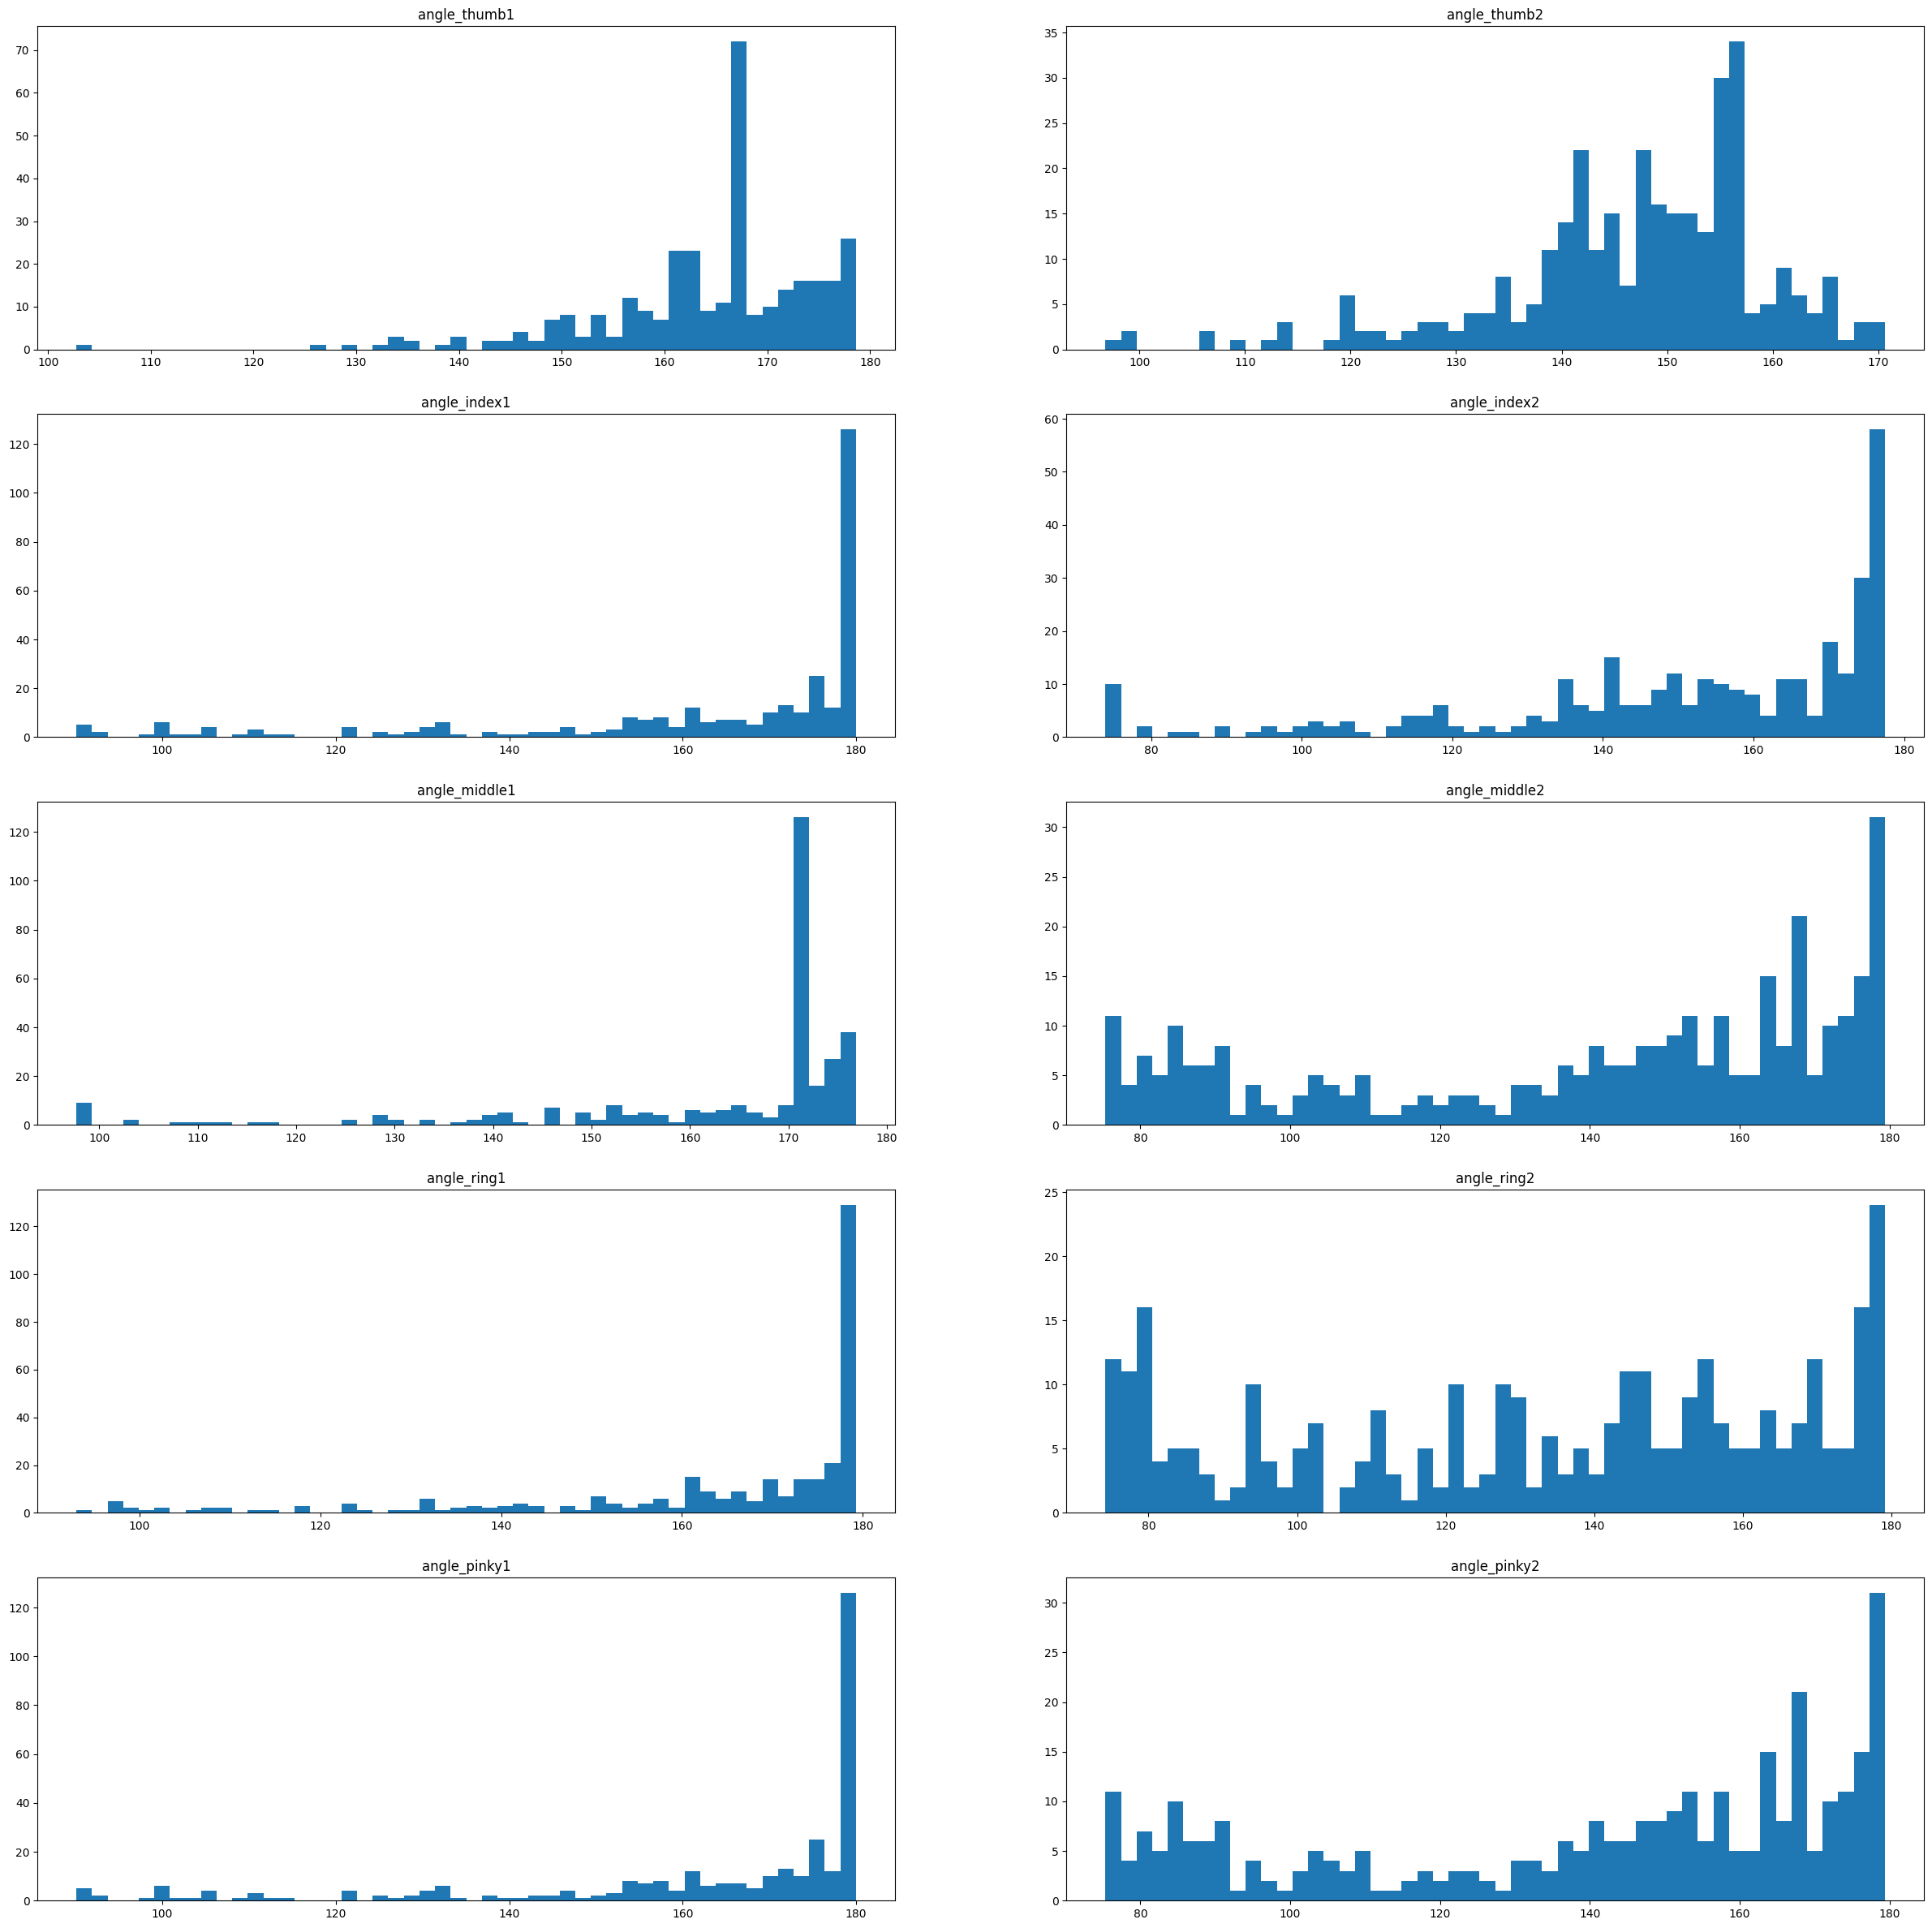

In [158]:
from matplotlib.pyplot import figure

figure(figsize=(30,30))

for i in range(10):
    
    ax = plt.subplot(5,2,i+1)
    

    ax.hist(df[list_col[75+i]], bins=50)
    ax.set_title(list_col[75+i])